# Proyek Analisis Data: Bike-Sharing Dataset
- **Nama:** Stevan Lukas Siahaan
- **Email Cohort:** mc325d5y1600@student.devacademy.id
- **Email Terdaftar:** stevan.535220053@stu.untar.ac.id
- **ID Dicoding:** stevan_lukas_15

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan performa penyewaan sepeda dihari libur (holiday) dan dihari kerja (workingday)? 
- Bagaimana pengaruh antara cuaca terhadap jumlah penyewa di setiap harinya?

## Import Semua Packages/Library yang Digunakan

In [117]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [118]:
# Table Day
day_df = pd.read_csv("data\day.csv", delimiter= ",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [119]:
# Table hour
hour_df = pd.read_csv("data\hour.csv", delimiter= ",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data "day.csv" dan data "hour.csv" memiliki feature atau kolom yang hampir sama. Semua kolom di "hour.csv" ada di "day.csv" kecuali kolom "hr" yang hanya ada di data "hour.csv"
- Dua dataset ini sama-sama bersifat time-series
- Hampir semua feature dari dataset ini bertipe numerik

### Assessing Data

In [120]:
# check kualitas dataset "day.csv"
day_df.info()
day_df.isna().sum()
print(f"Jumlah data yang duplicate: ", day_df.duplicated().sum())
day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah data yang duplicate:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [121]:
# check kualitas dataset "hour.csv"
hour_df.info()
hour_df.isna().sum()
print(f"Jumlah data yang duplicate: ", hour_df.duplicated().sum())
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah data yang duplicate:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Ternyata 2 dataset dapat dikatakan sebagai dataset yang cukup bersih karena tidak ada missing value dan duplicated data
- Nama-nama feature sepertinya lebih baik diganti dengan nama yang lebih relevan untuk memudahkan nanti pada saat tahap EDA/pemanggilan kolom jika dibutuhkan
- Ada kesalahan tipe data di kolom "dteday", harusnya kolom tersebut memiliki tipe data "datetime"
- Jika menelisik ke dalam guide dari dataset ini, kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit diisi dengan value yang merepresentasikan value lain. Akan lebih baik jika dilakukan konversi untuk setiap kolom tersebut

### Cleaning Data

1. Mengganti nama-nama kolom menjadi nama-nama yang lebih relevan

In [122]:
# day_df 
day_df.columns = ["record_id", "date", "season", "year", "month", "isHoliday", "day", "isWorkingDay", "weather_situation", "temperature", "feeling_temperature", "humidity", "wind_speed", "total_casual_users", "total_registered_users", "total_rental"]

day_df.head()
# print(day_df.columns)

,record_id,date,season,year,month,isHoliday,day,isWorkingDay,weather_situation,temperature,feeling_temperature,humidity,wind_speed,total_casual_users,total_registered_users,total_rental
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [123]:
# hour_df
hour_df.columns = ["record_id", "date", "season", "year", "month", "hour_time", "isHoliday", "day", "isWorkingDay", "weather_situation", "temperature", "feeling_temperature", "humidity", "wind_speed", "total_casual_users", "total_registered_users", "total_rental"]
hour_df.head()
print(hour_df.columns)

Index(['record_id', 'date', 'season', 'year', 'month', 'hour_time',
       'isHoliday', 'day', 'isWorkingDay', 'weather_situation', 'temperature',
       'feeling_temperature', 'humidity', 'wind_speed', 'total_casual_users',
       'total_registered_users', 'total_rental'],
      dtype='object')


2. Mengganti tipe data kolom "date"

In [124]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   record_id               731 non-null    int64  
 1   date                    731 non-null    object 
 2   season                  731 non-null    int64  
 3   year                    731 non-null    int64  
 4   month                   731 non-null    int64  
 5   isHoliday               731 non-null    int64  
 6   day                     731 non-null    int64  
 7   isWorkingDay            731 non-null    int64  
 8   weather_situation       731 non-null    int64  
 9   temperature             731 non-null    float64
 10  feeling_temperature     731 non-null    float64
 11  humidity                731 non-null    float64
 12  wind_speed              731 non-null    float64
 13  total_casual_users      731 non-null    int64  
 14  total_registered_users  731 non-null    in

In [125]:
day_df["date"] = pd.to_datetime(day_df["date"])
day_df.info()

hour_df["date"] = pd.to_datetime(hour_df["date"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   record_id               731 non-null    int64         
 1   date                    731 non-null    datetime64[ns]
 2   season                  731 non-null    int64         
 3   year                    731 non-null    int64         
 4   month                   731 non-null    int64         
 5   isHoliday               731 non-null    int64         
 6   day                     731 non-null    int64         
 7   isWorkingDay            731 non-null    int64         
 8   weather_situation       731 non-null    int64         
 9   temperature             731 non-null    float64       
 10  feeling_temperature     731 non-null    float64       
 11  humidity                731 non-null    float64       
 12  wind_speed              731 non-null    float64   

3. Melakukan konversi dari nilai representatif ke value sebenarnya

A. Kolom season

In [126]:
season_mapping = {
    1: "Springer", 
    2: "Summer", 
    3: "Fall", 
    4: "Winter"
}

day_df.head()
day_df["season"] = day_df["season"].replace(season_mapping)

hour_df.head()
hour_df["season"] = hour_df["season"].replace(season_mapping)

In [127]:
day_df.info()
hour_df.info()

day_df.head()
hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   record_id               731 non-null    int64         
 1   date                    731 non-null    datetime64[ns]
 2   season                  731 non-null    object        
 3   year                    731 non-null    int64         
 4   month                   731 non-null    int64         
 5   isHoliday               731 non-null    int64         
 6   day                     731 non-null    int64         
 7   isWorkingDay            731 non-null    int64         
 8   weather_situation       731 non-null    int64         
 9   temperature             731 non-null    float64       
 10  feeling_temperature     731 non-null    float64       
 11  humidity                731 non-null    float64       
 12  wind_speed              731 non-null    float64   

,record_id,date,season,year,month,hour_time,isHoliday,day,isWorkingDay,weather_situation,temperature,feeling_temperature,humidity,wind_speed,total_casual_users,total_registered_users,total_rental
0,1,2011-01-01,Springer,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


B. Kolom year

In [128]:
year_mapping= {
    0: 2011,
    1: 2012
}

day_df["year"] = day_df["year"].replace(year_mapping)
hour_df["year"] = hour_df["year"].replace(year_mapping)

In [129]:
day_df.info()
hour_df.info()

day_df.head()
hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   record_id               731 non-null    int64         
 1   date                    731 non-null    datetime64[ns]
 2   season                  731 non-null    object        
 3   year                    731 non-null    int64         
 4   month                   731 non-null    int64         
 5   isHoliday               731 non-null    int64         
 6   day                     731 non-null    int64         
 7   isWorkingDay            731 non-null    int64         
 8   weather_situation       731 non-null    int64         
 9   temperature             731 non-null    float64       
 10  feeling_temperature     731 non-null    float64       
 11  humidity                731 non-null    float64       
 12  wind_speed              731 non-null    float64   

,record_id,date,season,year,month,hour_time,isHoliday,day,isWorkingDay,weather_situation,temperature,feeling_temperature,humidity,wind_speed,total_casual_users,total_registered_users,total_rental
0,1,2011-01-01,Springer,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


C. Kolom Month

In [130]:
month_mapping = {
    1: "January",  
    2: "February",  
    3: "March",  
    4: "April",
    5: "May",  
    6: "June",  
    7: "July",  
    8: "August",
    9: "September",  
    10: "October",  
    11: "November",  
    12: "December"
}

day_df["month"] = day_df["month"].replace(month_mapping)
hour_df["month"] = hour_df["month"].replace(month_mapping)

In [131]:
day_df.info()
hour_df.info()

day_df.head()
hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   record_id               731 non-null    int64         
 1   date                    731 non-null    datetime64[ns]
 2   season                  731 non-null    object        
 3   year                    731 non-null    int64         
 4   month                   731 non-null    object        
 5   isHoliday               731 non-null    int64         
 6   day                     731 non-null    int64         
 7   isWorkingDay            731 non-null    int64         
 8   weather_situation       731 non-null    int64         
 9   temperature             731 non-null    float64       
 10  feeling_temperature     731 non-null    float64       
 11  humidity                731 non-null    float64       
 12  wind_speed              731 non-null    float64   

,record_id,date,season,year,month,hour_time,isHoliday,day,isWorkingDay,weather_situation,temperature,feeling_temperature,humidity,wind_speed,total_casual_users,total_registered_users,total_rental
0,1,2011-01-01,Springer,2011,January,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


D. Kolom day

In [132]:
weekday_mapping = {
    0: "Sunday", 
    1: "Monday", 
    2: "Tuesday", 
    3: "Wednesday",
    4: "Thursday", 
    5: "Friday", 
    6: "Saturday"
}

day_df["day"] = day_df["day"].replace(weekday_mapping)
hour_df["day"] = hour_df["day"].replace(weekday_mapping)

In [133]:
day_df.info()
hour_df.info()

day_df.head(10)
# hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   record_id               731 non-null    int64         
 1   date                    731 non-null    datetime64[ns]
 2   season                  731 non-null    object        
 3   year                    731 non-null    int64         
 4   month                   731 non-null    object        
 5   isHoliday               731 non-null    int64         
 6   day                     731 non-null    object        
 7   isWorkingDay            731 non-null    int64         
 8   weather_situation       731 non-null    int64         
 9   temperature             731 non-null    float64       
 10  feeling_temperature     731 non-null    float64       
 11  humidity                731 non-null    float64       
 12  wind_speed              731 non-null    float64   

,record_id,date,season,year,month,isHoliday,day,isWorkingDay,weather_situation,temperature,feeling_temperature,humidity,wind_speed,total_casual_users,total_registered_users,total_rental
0,1,2011-01-01,Springer,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,Springer,2011,January,0,Thursday,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,Springer,2011,January,0,Friday,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,Springer,2011,January,0,Saturday,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,Springer,2011,January,0,Sunday,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,Springer,2011,January,0,Monday,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


E. Kolom weather_situation

In [134]:
weather_mapping = {
    1: "Clear/Few Clouds/Partly Cloudy",
    2: "Mist with Cloudy/Broken Clouds/Few Clouds",
    3: "Light Rain/Snow with Thunderstorm/Scattered clouds",
    4: "Heavy Storm/Snow"
}

for df in [day_df, hour_df]:
    df["weather_desc"] = df["weather_situation"].replace(weather_mapping)
    df["weather_desc"] = df["weather_desc"].astype("category")

    # repositioning "weather_desc" 
    column_position = df.columns.get_loc("weather_situation") + 1
    df.insert(column_position, "weather_desc", df.pop("weather_desc"))


In [135]:
day_df.head()
hour_df.head()

,record_id,date,season,year,month,hour_time,isHoliday,day,isWorkingDay,weather_situation,weather_desc,temperature,feeling_temperature,humidity,wind_speed,total_casual_users,total_registered_users,total_rental
0,1,2011-01-01,Springer,2011,January,0,0,Saturday,0,1,Clear/Few Clouds/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,0,Saturday,0,1,Clear/Few Clouds/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,0,Saturday,0,1,Clear/Few Clouds/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,0,Saturday,0,1,Clear/Few Clouds/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,0,Saturday,0,1,Clear/Few Clouds/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


F. Reverting Data dari Normalized ke data hasil observasi

In [136]:
day_df["temperature"] = day_df["temperature"] * 41  
day_df["feeling_temperature"] = day_df["feeling_temperature"] * 50 
day_df["wind_speed"] = day_df["wind_speed"] * 67 
day_df["humidity"] = day_df["humidity"]*100

hour_df["temperature"] = hour_df["temperature"] * 41  
hour_df["feeling_temperature"] = hour_df["feeling_temperature"] * 50 
hour_df["wind_speed"] = hour_df["wind_speed"] * 67
hour_df["humidity"] = hour_df["humidity"]*100

In [137]:
# day_df.info()
# hour_df.info()

# print(day_df["temperature"].min(), day_df["temperature"].max())

day_df.describe()
hour_df.describe()

,record_id,date,year,hour_time,isHoliday,isWorkingDay,weather_situation,temperature,feeling_temperature,humidity,wind_speed,total_casual_users,total_registered_users,total_rental
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2011.502561,11.546752,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,2011.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2011.000000,6.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,2012.000000,12.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,2012.000000,18.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,2012.000000,23.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,6.914405,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599


In [138]:
day_df.head()
hour_df.head()

,record_id,date,season,year,month,hour_time,isHoliday,day,isWorkingDay,weather_situation,weather_desc,temperature,feeling_temperature,humidity,wind_speed,total_casual_users,total_registered_users,total_rental
0,1,2011-01-01,Springer,2011,January,0,0,Saturday,0,1,Clear/Few Clouds/Partly Cloudy,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,0,Saturday,0,1,Clear/Few Clouds/Partly Cloudy,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,0,Saturday,0,1,Clear/Few Clouds/Partly Cloudy,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,0,Saturday,0,1,Clear/Few Clouds/Partly Cloudy,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,0,Saturday,0,1,Clear/Few Clouds/Partly Cloudy,9.84,14.395,75.0,0.0,0,1,1


In [139]:
# menyimpan data yang sudah bersih 
day_df.to_csv("dashboard\cleaned_day.csv", index=False)

hour_df.to_csv("dashboard\cleaned_hour.csv", index=False)

**Insight:**
- Pengubahan nama kolom menjadi nama yang lebih relevan sangat memudahkan pembacaan tabel
- Converting normalized value (temperature, feeling_temperature, dan wind_speed) menjadikan valuenya lebih logis dan mudah dipahami
- Tidak semua kolom yang valuenya adalah representatif/pengkodean (misal season, year, dll) harus diubah menjadi categorical/object data type. Misalnya saja seperti isHoliday dan isWorkingDay, sepertinya akan lebih mudah ketika melakukan EDA jika nilai yang ada di tabel dipertahankan (bagus untuk numerical analysis nantinya)
- Ternyata data yang terlihat hampir bersih masih menyisakan banyak kekurangan dan jika kita melihat dari raw datasetnya masih kurang readable secara langsung
- Dua dataset ini memiliki kegunaan masing-masing, day.csv lebih berguna untuk analisis long-term trends sedangkan hour.csv lebih bagus untuk analisis pola rental harian. 
- Ternyata pada bulan-bulan November hingga sekitar Maret, Washington D.C memang memiliki suhu yang relatif rendah berdasarkan NOAA (National Oceanic and Atmospheric Administration)
- Value pada kolom temperature di day.csv pada dasarnya adalah average_temperature di hari itu jika ditelisik melalui hour.csv

## Exploratory Data Analysis (EDA)

Load dataset yang sudah bersih terlebih dahulu

In [140]:
day_clean_df = pd.read_csv("dashboard\cleaned_day.csv", delimiter= ",")
day_clean_df.info()
day_clean_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   record_id               731 non-null    int64  
 1   date                    731 non-null    object 
 2   season                  731 non-null    object 
 3   year                    731 non-null    int64  
 4   month                   731 non-null    object 
 5   isHoliday               731 non-null    int64  
 6   day                     731 non-null    object 
 7   isWorkingDay            731 non-null    int64  
 8   weather_situation       731 non-null    int64  
 9   weather_desc            731 non-null    object 
 10  temperature             731 non-null    float64
 11  feeling_temperature     731 non-null    float64
 12  humidity                731 non-null    float64
 13  wind_speed              731 non-null    float64
 14  total_casual_users      731 non-null    in

,record_id,date,season,year,month,isHoliday,day,isWorkingDay,weather_situation,weather_desc,temperature,feeling_temperature,humidity,wind_speed,total_casual_users,total_registered_users,total_rental
0,1,2011-01-01,Springer,2011,January,0,Saturday,0,2,Mist with Cloudy/Broken Clouds/Few Clouds,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Springer,2011,January,0,Sunday,0,2,Mist with Cloudy/Broken Clouds/Few Clouds,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Springer,2011,January,0,Monday,1,1,Clear/Few Clouds/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Springer,2011,January,0,Tuesday,1,1,Clear/Few Clouds/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Springer,2011,January,0,Wednesday,1,1,Clear/Few Clouds/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [141]:
hour_clean_df = pd.read_csv("dashboard\cleaned_hour.csv", delimiter= ",")
hour_clean_df.info()
hour_clean_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   record_id               17379 non-null  int64  
 1   date                    17379 non-null  object 
 2   season                  17379 non-null  object 
 3   year                    17379 non-null  int64  
 4   month                   17379 non-null  object 
 5   hour_time               17379 non-null  int64  
 6   isHoliday               17379 non-null  int64  
 7   day                     17379 non-null  object 
 8   isWorkingDay            17379 non-null  int64  
 9   weather_situation       17379 non-null  int64  
 10  weather_desc            17379 non-null  object 
 11  temperature             17379 non-null  float64
 12  feeling_temperature     17379 non-null  float64
 13  humidity                17379 non-null  float64
 14  wind_speed              17379 non-null

,record_id,date,season,year,month,hour_time,isHoliday,day,isWorkingDay,weather_situation,weather_desc,temperature,feeling_temperature,humidity,wind_speed,total_casual_users,total_registered_users,total_rental
0,1,2011-01-01,Springer,2011,January,0,0,Saturday,0,1,Clear/Few Clouds/Partly Cloudy,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,0,Saturday,0,1,Clear/Few Clouds/Partly Cloudy,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,0,Saturday,0,1,Clear/Few Clouds/Partly Cloudy,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,0,Saturday,0,1,Clear/Few Clouds/Partly Cloudy,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,0,Saturday,0,1,Clear/Few Clouds/Partly Cloudy,9.84,14.395,75.0,0.0,0,1,1


*EXPLORE RENTAL TRENDS PER BULAN dan SEASON*

In [142]:
day_clean_df.describe(include='all')

,record_id,date,season,year,month,isHoliday,day,isWorkingDay,weather_situation,weather_desc,temperature,feeling_temperature,humidity,wind_speed,total_casual_users,total_registered_users,total_rental
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,NaN,7,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,Fall,NaN,January,NaN,Saturday,NaN,NaN,Clear/Few Clouds/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,NaN,105,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,NaN,0.028728,NaN,0.683995,1.395349,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,0.167155,NaN,0.465233,0.544894,NaN,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,1.000000,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,1.000000,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,2012.000000,NaN,0.000000,NaN,1.000000,1.000000,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,2012.000000,NaN,0.000000,NaN,1.000000,2.000000,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000


In [143]:
month_order= ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_trends = day_clean_df.groupby(by="month").agg({
    "total_casual_users": ["min", "max", "sum"],
    "total_registered_users": ["min", "max", "sum"],
    "total_rental": ["min", "max", "sum"]  
}).reindex(month_order)
monthly_trends.head(13)

total_casual_users              total_registered_users        \
                         min   max    sum                    min   max   
month                                                                    
January                    9  1070  12042                    416  4185   
February                  47  1435  14963                    905  4546   
March                     46  3155  44444                    491  5893   
April                    120  3252  60802                    674  5950   
May                      255  3410  75285                   2213  6433   
June                     477  2963  73906                   2993  6456   
July                     562  3065  78157                   2298  6790   
August                   226  2827  72039                    889  6541   
September                118  3160  70323                   1689  6946   
October                    2  3031  59760                     20  6911   
November                  69  2290  36603                    935  5520   
December                   9  1153  21693                    432  6055   

                  total_rental                
              sum          min   max     sum  
month                                         
January    122891          431  4521  134933  
February   136389         1005  5062  151352  
March      184476          605  8362  228920  
April      208292          795  7460  269094  
May        256401         2633  8294  331686  
June       272436         3767  8120  346342  
July       266791         3285  8173  344948  
August     279155         1115  7865  351194  
September  275668         1842  8714  345991  
October    262592           22  8156  322352  
November   218228         1495  6852  254831  
December   189343          441  6606  211036

- Total penyewaan sepeda yang paling tinggi ada di bulan Agustus dan paling rendah ada di bulan Januari
- Jumlah penyewa sepeda mulai turun di September dan titik terendahnya ada di bulan Januari
- Berdasarkan hasil analisis diatas dan sumber dari website resmi Washington DC, Januari adalah bulan yang paling dingin. Inilah penyebab mengapa jumlah penyewa sepeda sangat rendah

In [153]:
season_order = ["Springer", "Summer", "Fall", "Winter"]
season_trends = day_clean_df.groupby(by="season").agg({
    "total_casual_users": ["min", "max", "sum"],
    "total_registered_users": ["min", "max", "sum"],
    "total_rental": ["min", "max", "sum"]  
}).reindex(season_order)
season_trends.head()

total_casual_users               total_registered_users        \
                        min   max     sum                    min   max   
season                                                                   
Springer                  9  3155   60622                    416  5315   
Summer                  120  3410  203522                    674  6456   
Fall                    118  3160  226091                    889  6917   
Winter                    2  3031  129782                     20  6946   

                 total_rental                 
             sum          min   max      sum  
season                                        
Springer  410726          431  7836   471348  
Summer    715067          795  8362   918589  
Fall      835038         1115  8714  1061129  
Winter    711831           22  8555   841613

- Jumlah penyewa sepeda paling tinggi ada di musim Fall/Gugur, suhu udara di musim ini sangat enak dan cocok untuk naik sepeda karena lumayan hangat 
- Jumlah penyewa paling sedikit ada di musim Spring/Semi. Berdasarkan riset saya di internet, ekspektasi di musim ini tidak terlalu baik karena cuacanya yang cukup unpredictable, namun pada bulan May cuaca jauh lebih stabil untuk ukuran Spring season
- Masyarakat di D.C sangat suka menggunakan sepeda di musim Fall/Gugur dan Summer/panas

*PERBEDAAN JUMLAH CASUAL dan REGISTERED USERS PER TAHUN*

In [145]:
day_clean_df.describe(include='all')

,record_id,date,season,year,month,isHoliday,day,isWorkingDay,weather_situation,weather_desc,temperature,feeling_temperature,humidity,wind_speed,total_casual_users,total_registered_users,total_rental
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,NaN,7,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,Fall,NaN,January,NaN,Saturday,NaN,NaN,Clear/Few Clouds/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,NaN,105,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,NaN,0.028728,NaN,0.683995,1.395349,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,0.167155,NaN,0.465233,0.544894,NaN,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,1.000000,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,1.000000,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,2012.000000,NaN,0.000000,NaN,1.000000,1.000000,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,2012.000000,NaN,0.000000,NaN,1.000000,2.000000,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000


In [146]:
yearly_trends = day_clean_df.groupby(by="year").agg({
    "total_casual_users": "sum",
    "total_registered_users": "sum",
})
yearly_trends.head()

,total_casual_users,total_registered_users
year,,
2011,247252,995851
2012,372765,1676811


- Ada kenaikan yang cukup signifikan dari tahun 2011 dan 2012. Dalam satu tahun sudah ada kenaikan sebanyak 125,513 pengguna casual dan 680,960 pengguna yang terdaftar

*WEEKLY PATTERN*

In [147]:
#find weekly pattern
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_pattern= day_clean_df.groupby(by="day").agg({
    "total_rental": "mean",
    "total_casual_users": "mean",
    "total_registered_users": "mean"
}).round().reindex(weekday_order)

weekly_pattern.head(7)

,total_rental,total_casual_users,total_registered_users
day,,,
Monday,4338.0,674.0,3664.0
Tuesday,4511.0,556.0,3954.0
Wednesday,4549.0,551.0,3997.0
Thursday,4667.0,591.0,4076.0
Friday,4690.0,752.0,3938.0
Saturday,4551.0,1465.0,3085.0
Sunday,4229.0,1338.0,2891.0


- Jumlah pengguna terbanyak ada di hari Jumat yang merupakan hari menjelang weekend.
- Hari Minggu merupakan hari dimana paling sedikit penyewa sepeda, karena di hari ini rata-rata masyarakat menghabiskan waktu untuk liburan/jalan-jalan, pergi ke Museum, hangout bersama keluarga, landmark memorials (contoh: Marthin Luther King Jr. Memorial), dan pergi ke Gereja

EXPLORE PENGARUH JENIS HARI (KERJA/LIBUR) TERHADAP JUMLAH PENYEWA SEPEDA

In [148]:
day_clean_df["day_type"] = day_clean_df.apply(
    lambda row: "Holiday" if row["isHoliday"] == 1 else "Working Day" if row["isWorkingDay"] == 1 else "Weekend", axis=1
)

byday_type = day_clean_df.groupby("day_type")["total_rental"].mean().round().astype(int).reset_index()

byday_type.head()

,day_type,total_rental
0,Holiday,3735
1,Weekend,4390
2,Working Day,4585


- Rata-

EXPLORE PENGARUH CUACA TERHADAP JUMLAH PENYEWA DI SETIAP HARINYA

In [149]:
byweather_day = day_clean_df.groupby("weather_desc")["total_rental"].mean().round().astype(int).reset_index()

byweather_day.head()

,weather_desc,total_rental
0,Clear/Few Clouds/Partly Cloudy,4877
1,Light Rain/Snow with Thunderstorm/Scattered cl...,1803
2,Mist with Cloudy/Broken Clouds/Few Clouds,4036


**Insight:**
- Explore 1: Working Day adalah jenis hari yang dimana paling banyak penyewa sepeda
- Explore 2: Rata-rata orang menyewa sepeda ketika cuaca sedang cerah atau sedikit berawan

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\Stevan Lukas\AppData\Local\Temp\ipykernel_28700\80060952.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day_type", y="total_rental", data=byday_type, palette="magma")


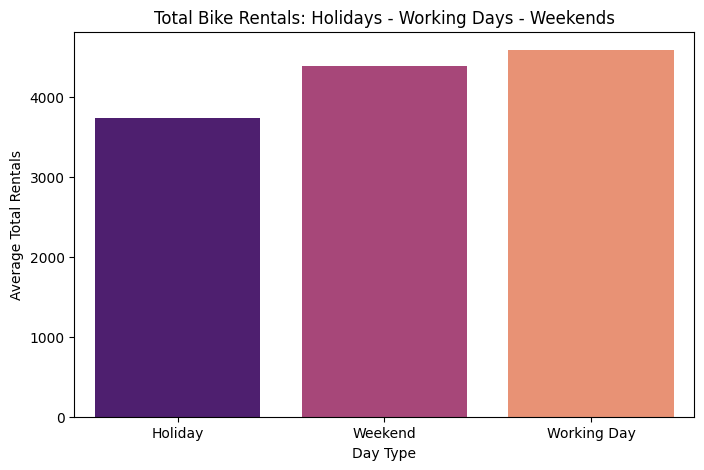

In [150]:
plt.figure(figsize=(8, 5))
sns.barplot(x="day_type", y="total_rental", data=byday_type, palette="magma")
plt.xlabel("Day Type")
plt.ylabel("Average Total Rentals")
plt.title("Total Bike Rentals: Holidays - Working Days - Weekends")
plt.show()

### Pertanyaan 2:

C:\Users\Stevan Lukas\AppData\Local\Temp\ipykernel_28700\3849215608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weather_desc", y="total_rental", data=byweather_day, palette="PuBu")


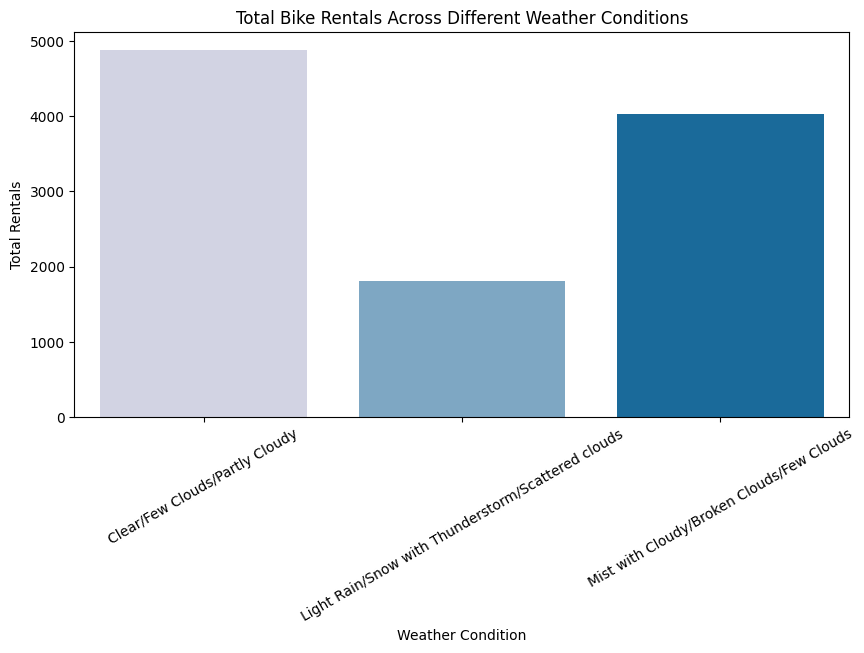

In [151]:
plt.figure(figsize=(10, 5))
sns.barplot(x="weather_desc", y="total_rental", data=byweather_day, palette="PuBu")
plt.xlabel("Weather Condition")
plt.ylabel("Total Rentals")
plt.title("Total Bike Rentals Across Different Weather Conditions")
plt.xticks(rotation=30)
plt.show()

**Insight:**

*A. Explore 1:*
* Banyak user yang menyewa sepeda pada saat hari kerja dan pada hari libur jumlah penyewa sepeda relatif lebih sedikit
* Hal ini sesuai dengan sumber yang saya baca di internet, bahwa rata-rata masyarakat Washington DC lebih suka menggunakan sepeda untuk berkegiatan (kerja, sekolah, dll)
* Jumlah penyewa di hari libur relatif rendah karena biasanya hari libur digunakan masyarakat untuk pergi rekreasi keluar kota sehingga mereka lebih sering menggunakan public transportation karena jarak perjalanan yang relatif jauh

*B. Explore 2:*
* Jumlah penyewa sangat banyak ketika cuaca sedang cerah dan ketika cuaca agak sedikit mendung ada penurunan pada jumlah penyewa sepeda
* Jumlah penyewa sepeda paling sedikit ketika cuaca sedang ada hujan atau salju, hal ini disebabkan karena kondisi jalan yang licin sehingga berbahaya dan juga berpotensi terkena air hujan selama perjalanan

## Analisis Lanjutan (Opsional)

## Conclusion

- Masyarakat lebih sering menggunakan sepeda untuk bepergian produktif seperti bekerja dan lebih sering menggunakan jenis kendaraan yang lain saat ada waktu senggang, dalam konteks ini ada 2 kondisi yakni hari libur dan akhir pekan
- Kondisi cuaca di setiap harinya sangat mempengaruhi jumlah penyewa sepeda. Hal ini disebabkan oleh kebiasaan masyarakat yang memilih jenis kendaraan yang sesuai dengan cuaca di hari tersebut. Semakin buruk cuacanya, maka customer akan lebih sering menggunakan kendaraan yang tertutup/beratap agar terhindar dari air